Acerca de Dataset

Este conjunto de datos contiene datos agrícolas de 1.000.000 de muestras destinadas a predecir el rendimiento de los cultivos (en toneladas por hectárea) en base a diversos factores. El conjunto de datos se puede utilizar para tareas de regresión en el aprendizaje automático, especialmente para predecir la productividad de los cultivos.

    Región: Región geográfica donde se cultiva el cultivo (norte, este, sur, oeste).
    Tipo de suelo: El tipo de tierra en la que se planta la cosecha (Clay, Sandy, Loam, Silt, Peaty, Chalky).
    Crop: El tipo de cultivo (Wheat, Rice, Maíz, cebada, Soybea, algodón).
    Lluvias: La cantidad de lluvias recibidas en milímetros durante el período de crecimiento de los cultivos.
    Temperatura-Celsius: La temperatura media durante el período de crecimiento de la cosecha, medida en grados Celsius.
    Fertilizante-Usado: Indica si se aplicó fertilizante (Verdad = Sí, Falso = No).
    Irrigación-Usado: Indica si el riego se utilizó durante el período de crecimiento de los cultivos (True = Sí, Falso = No).
    TiempoCondición: La condición meteorológica predominante durante la temporada de crecimiento (Sol, Rainy, Cloudy).
    Días de la cosecha: El número de días tomados para que el cultivo sea cosechado después de la siembra.
    Yield-tons-per-hectre: El rendimiento total de la cosecha producido, medido en toneladas por hectárea.

https://www.kaggle.com/datasets/samuelotiattakorah/agriculture-crop-yield?resource=download

In [2]:
import pandas as pd

# Cargar el archivo (ajusta si tiene extensión .csv o .xlsx)
df = pd.read_csv("crop_yield.csv")  # o "crop_yield.xlsx"

# Ver las primeras filas
df.head()



,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [3]:
# Dimensiones del dataset
print("Filas y columnas:", df.shape)

# Tipos de datos y valores faltantes
print(df.info())

# Revisar valores únicos por columna
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")


Filas y columnas: (1000000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB
None
Region: 4 valores únicos
Soil_Type: 6 valores únicos
Crop: 6 valores únicos
Rainfall_mm: 1000000 valores únicos
Tempera

In [4]:
# Eliminar duplicados si los hay
df = df.drop_duplicates()

# Buscar valores nulos
print(df.isnull().sum())

# Opcional: eliminar columnas que no aportan o tienen muchos nulos
# df = df.drop(columns=['nombre_columna_irrelevante'])

# Mostrar resumen estadístico
df.describe(include='all')


Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64


,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
count,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000,1000000,1000000,1000000.000000,1000000.000000
unique,4,6,6,NaN,NaN,2,2,3,NaN,NaN
top,North,Sandy,Maize,NaN,NaN,False,False,Sunny,NaN,NaN
freq,250173,167119,166824,NaN,NaN,500060,500509,333790,NaN,NaN
mean,NaN,NaN,NaN,549.981901,27.504965,NaN,NaN,NaN,104.495025,4.649472
std,NaN,NaN,NaN,259.851320,7.220608,NaN,NaN,NaN,25.953412,1.696572
min,NaN,NaN,NaN,100.000896,15.000034,NaN,NaN,NaN,60.000000,-1.147613
25%,NaN,NaN,NaN,324.891090,21.254502,NaN,NaN,NaN,82.000000,3.417637
50%,NaN,NaN,NaN,550.124061,27.507365,NaN,NaN,NaN,104.000000,4.651808
75%,NaN,NaN,NaN,774.738520,33.753267,NaN,NaN,NaN,127.000000,5.879200


Paso 1: Se cargo el dataset crop_yield y realizamos una limpieza básica: eliminación de duplicados, inspección de valores nulos y revisión del contenido general de las variables.

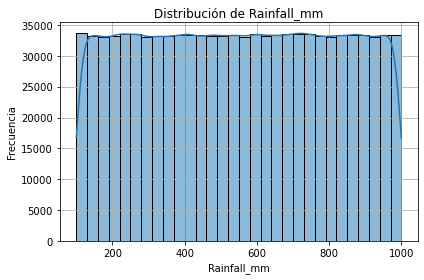

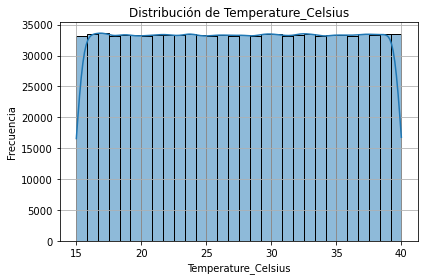

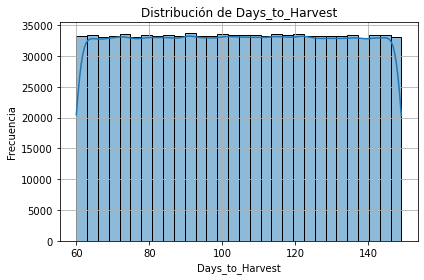

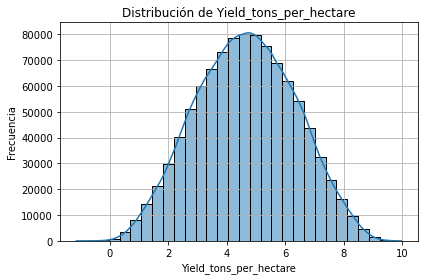

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar columnas numéricas
num_cols = df.select_dtypes(include='number').columns

# Histograma por variable
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


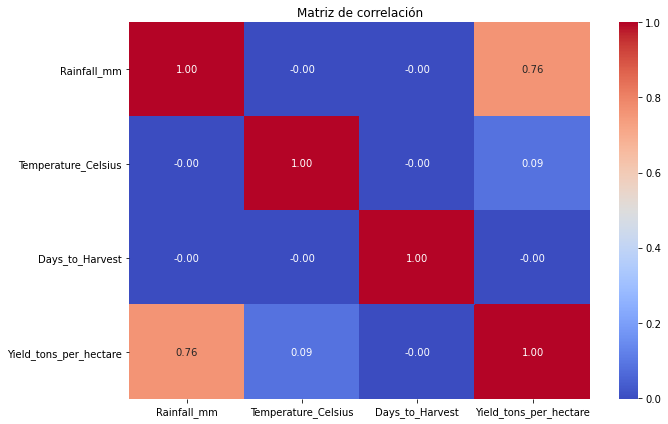

In [6]:
# Correlación entre variables numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()


In [8]:
print(df.columns.tolist())

['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition', 'Days_to_Harvest', 'Yield_tons_per_hectare']


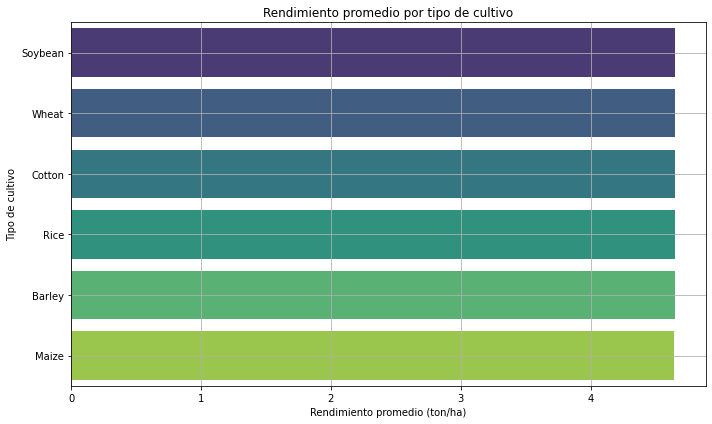

In [9]:
# Rendimiento promedio por tipo de cultivo
resumen = df.groupby('Crop')['Yield_tons_per_hectare'].mean().sort_values(ascending=False)

# Gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=resumen.values, y=resumen.index, palette='viridis')
plt.xlabel("Rendimiento promedio (ton/ha)")
plt.ylabel("Tipo de cultivo")
plt.title("Rendimiento promedio por tipo de cultivo")
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
# Agrupar por combinación de factores
resumen_combo = df.groupby(['Soil_Type', 'Fertilizer_Used', 'Irrigation_Used'])['Yield_tons_per_hectare'].mean().reset_index()

# Ordenar por mayor rendimiento
resumen_combo = resumen_combo.sort_values(by='Yield_tons_per_hectare', ascending=False)

# Mostrar tabla de resumen
print(resumen_combo.head(10))


   Soil_Type  Fertilizer_Used  Irrigation_Used  Yield_tons_per_hectare
3     Chalky             True             True                6.009204
15     Peaty             True             True                6.002680
23      Silt             True             True                6.001210
11      Loam             True             True                6.000142
19     Sandy             True             True                5.990583
7       Clay             True             True                5.990213
14     Peaty             True            False                4.808886
6       Clay             True            False                4.806656
18     Sandy             True            False                4.804281
2     Chalky             True            False                4.797224


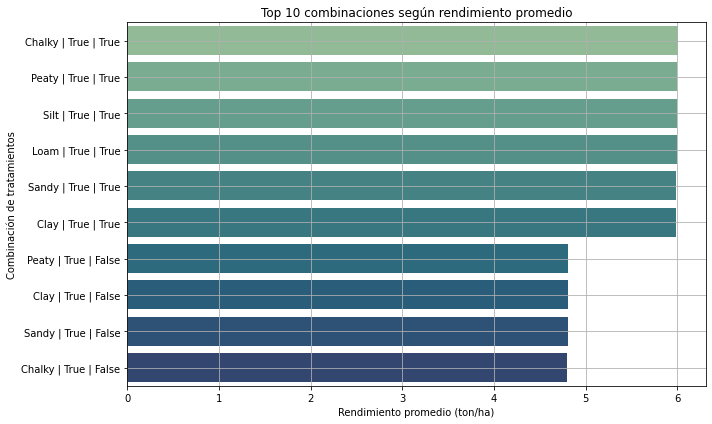

In [13]:
# Crear una columna con la combinación de tratamientos

# Convertir las columnas a string antes de concatenar
resumen_combo['Combinación'] = (
    resumen_combo['Soil_Type'].astype(str) + ' | ' +
    resumen_combo['Fertilizer_Used'].astype(str) + ' | ' +
    resumen_combo['Irrigation_Used'].astype(str)
)

plt.figure(figsize=(10, 6))
sns.barplot(data=resumen_combo.head(10), 
            x='Yield_tons_per_hectare', 
            y='Combinación', 
            palette='crest')

plt.xlabel("Rendimiento promedio (ton/ha)")
plt.ylabel("Combinación de tratamientos")
plt.title("Top 10 combinaciones según rendimiento promedio")
plt.grid(True)
plt.tight_layout()
plt.show()

Paso 3: Simulación de un Diseño Factorial 2³

Usaremos las siguientes tres variables como factores controlables:

    Soil_Type: seleccionamos solo dos niveles (ej. "Loamy" y "Clay")

    Fertilizer_Used: True (sí) o False (no)

    Irrigation_Used: True (sí) o False (no)

Aplicaremos un modelo tipo ANOVA para analizar cómo estos factores afectan el rendimiento 

In [14]:
# Filtrar solo para dos tipos de suelo: Loamy y Clay
df_exp = df[df['Soil_Type'].isin(['Loamy', 'Clay'])].copy()

# Convertir a factores categóricos
df_exp['Soil_Type'] = df_exp['Soil_Type'].astype('category')
df_exp['Fertilizer_Used'] = df_exp['Fertilizer_Used'].astype('category')
df_exp['Irrigation_Used'] = df_exp['Irrigation_Used'].astype('category')

# Revisar combinación de tratamientos y conteo
print(df_exp.groupby(['Soil_Type', 'Fertilizer_Used', 'Irrigation_Used']).size())


Soil_Type  Fertilizer_Used  Irrigation_Used
Clay       False            False              41941
                            True               41561
           True             False              41435
                            True               41415
dtype: int64


In [15]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Modelo ANOVA con efectos principales
modelo = smf.ols('Yield_tons_per_hectare ~ Soil_Type + Fertilizer_Used + Irrigation_Used', data=df_exp).fit()

# Tabla ANOVA
tabla_anova = anova_lm(modelo)
print(tabla_anova)


                       df         sum_sq       mean_sq             F  PR(>F)
Soil_Type             0.0       0.000000           NaN           NaN     NaN
Fertilizer_Used       1.0   93686.172569  93686.172569  48015.559753     0.0
Irrigation_Used       1.0   59531.298179  59531.298179  30510.677579     0.0
Residual         166349.0  324573.975621      1.951163           NaN     NaN


Paso 3: Simulamos un diseño factorial 2³ con tres factores clave en el rendimiento: tipo de suelo, uso de fertilizante y uso de riego. Aplicamos un modelo ANOVA para evaluar la significancia de cada factor en la producción agrícola.

Paso 4: Segmentación de fincas/productores según condiciones agroclimáticas

se usara clustering (agrupamiento no supervisado) para identificar grupos similares de registros basados en variables como:

    Rainfall_mm

    Temperature_Celsius

    Days_to_Harvest

    Yield_tons_per_hectare

Esto  permite descubrir tipologías de producción o zonas agroclimáticas con patrones comunes.

In [16]:
from sklearn.preprocessing import StandardScaler

# Seleccionar variables para segmentar
vars_segmentacion = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare']
X = df[vars_segmentacion].dropna()  # Eliminar filas con nulos

# Escalar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [20]:
from sklearn.cluster import KMeans

# Elegir número de clusters (por ejemplo, 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Agregar los clusters al dataframe original
X_clustered = X.copy()
X_clustered['Cluster'] = clusters


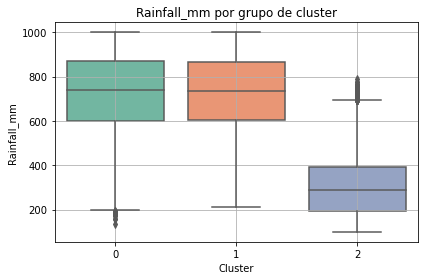

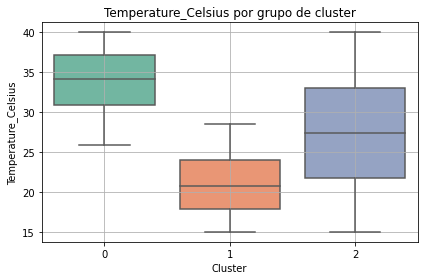

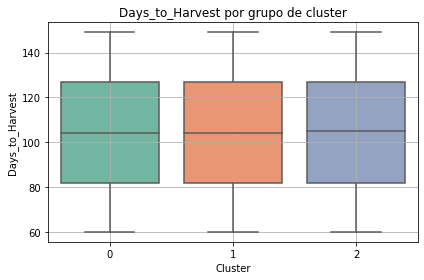

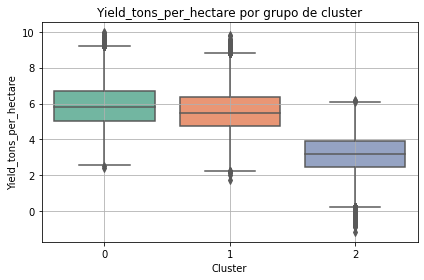

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots por cluster
for col in vars_segmentacion:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Cluster', y=col, data=X_clustered, palette='Set2')
    plt.title(f'{col} por grupo de cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Cada cluster representa un tipo de zona/productor según su rendimiento y condiciones climáticas.

Puedes cruzar luego los clusters con la región, cultivo o prácticas para ver si hay patrones.

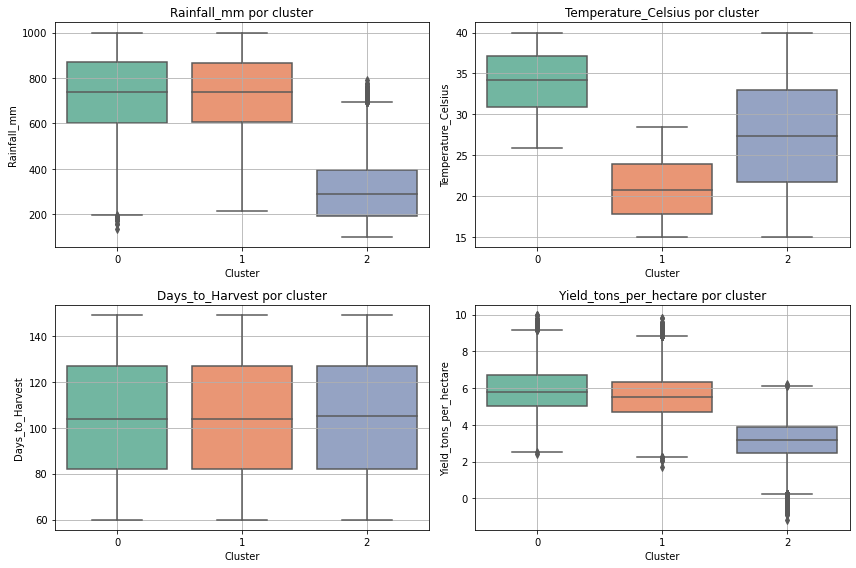

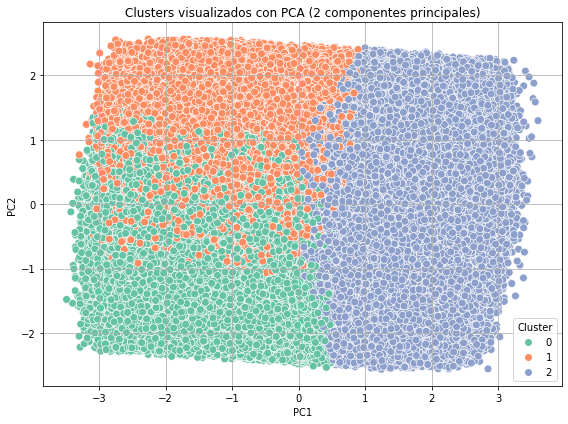

In [21]:
# 📦 Librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# ✅ Seleccionar las variables numéricas para la segmentación
vars_seg = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare']
df_seg = df[vars_seg].dropna().copy()

# 🔄 Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_seg)

# 🚀 Aplicar KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_seg['Cluster'] = kmeans.fit_predict(X_scaled)

# 📊 Boxplots para analizar cada variable por cluster
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, var in zip(axes.flatten(), vars_seg):
    sns.boxplot(data=df_seg, x='Cluster', y=var, ax=ax, palette='Set2')
    ax.set_title(f'{var} por cluster')
    ax.grid(True)
plt.tight_layout()
plt.show()

# 🎯 Reducción de dimensionalidad con PCA para graficar en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_seg['PC1'] = X_pca[:, 0]
df_seg['PC2'] = X_pca[:, 1]

# 🌐 Gráfico de dispersión con clusters proyectados en 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_seg, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60)
plt.title('Clusters visualizados con PCA (2 componentes principales)')
plt.grid(True)
plt.tight_layout()
plt.show()


Se realizo una segmentación de los datos agrícolas utilizando variables climáticas y productivas. El clustering K-Means nos permitió identificar tres grupos con patrones diferentes. Visualizamos los grupos con boxplots por variable y mediante reducción de dimensionalidad con PCA para representar su separación en un espacio 2D.